In [2]:
# WeatherPy.ipynb
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from config import weather_api_key
import requests

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinate_list = list(lat_lngs)
coordinate_list

[(5.474175525488974, -22.088358490065247),
 (35.7523444021525, -155.0989315098165),
 (-18.892803034239407, 78.90409822344498),
 (-87.39018786119453, -34.14371997743504),
 (-46.857558952770304, 82.03373284383053),
 (50.43562936395571, 166.4295952857401),
 (51.261244834135965, 172.76717482527425),
 (-3.4906157928197814, 65.90824049298294),
 (-7.07710087769442, -169.95409855585712),
 (-74.22465608796328, 46.5268893607803),
 (46.27363642822476, -20.49112133590978),
 (-0.4182011920444211, -163.0004773463718),
 (-71.03763699759826, 14.951643007942153),
 (19.40189511081475, -136.50647471061313),
 (0.19733537946355284, -78.79291387785962),
 (61.77079411919337, 89.94914107332448),
 (81.97747307055863, 107.59131413155586),
 (66.14619794187752, -169.9225288154802),
 (4.480624567714045, -58.507205133807744),
 (-84.05679311860696, -78.73654693878505),
 (-65.53940983039499, -119.38855078865788),
 (-60.55939587814471, -163.7851514209652),
 (63.300756450603814, -44.09383233509209),
 (31.12287651594695

In [5]:
# Create a list for holding the cities.
cities = []
# For each coordinate pair in coordinate_list identify the nearest city using citypy method
for coordinate in coordinate_list:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
cities

['bubaque',
 'kapaa',
 'hithadhoo',
 'ushuaia',
 'busselton',
 'nikolskoye',
 'saleaula',
 'port alfred',
 'vila franca do campo',
 'samusu',
 'bredasdorp',
 'hilo',
 'quito',
 'teya',
 'khatanga',
 'lavrentiya',
 'ituni',
 'rikitea',
 'avarua',
 'qaqortoq',
 'half moon bay',
 'vejle',
 'presidencia roque saenz pena',
 'los llanos de aridane',
 'punta arenas',
 'codrington',
 'jamestown',
 'nanortalik',
 'chuy',
 'kuche',
 'broome',
 'butaritari',
 'tumannyy',
 'barrow',
 'necochea',
 'kihei',
 'rio gallegos',
 'pangnirtung',
 'bethel',
 'taolanaro',
 'mahebourg',
 'general pico',
 'lompoc',
 'qaanaaq',
 'hermanus',
 'diffa',
 'puerto escondido',
 'vaini',
 'mugla',
 'umm lajj',
 'mataura',
 'saldanha',
 'cape town',
 'upernavik',
 'leningradskiy',
 'sentyabrskiy',
 'chabahar',
 'dikson',
 'new norfolk',
 'alofi',
 'carnarvon',
 'celestun',
 'kodiak',
 'port-gentil',
 'esperance',
 'ranong',
 'tabiauea',
 'antofagasta',
 'narsaq',
 'issa',
 'ebeltoft',
 'valdivia',
 'chara',
 'kahului'

In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "Boston"

In [31]:
city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"

In [32]:
city_weather = requests.get(city_url)
city_weather.json()


{'coord': {'lon': 4.43, 'lat': 7.87},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'model',
 'main': {'temp': 69.33,
  'feels_like': 60.46,
  'temp_min': 69.33,
  'temp_max': 69.33,
  'pressure': 1013,
  'humidity': 23,
  'sea_level': 1013,
  'grnd_level': 970},
 'wind': {'speed': 8.88, 'deg': 14},
 'clouds': {'all': 0},
 'dt': 1578009583,
 'sys': {'country': 'NG', 'sunrise': 1578030962, 'sunset': 1578072994},
 'timezone': 3600,
 'id': 2337490,
 'name': 'Ilawe',
 'cod': 200}

In [9]:
# Get the JSON data.
boston_data = city_weather.json()
boston_data['sys']['country']

'US'

In [10]:
boston_data["coord"]['lat']

42.36

In [11]:
boston_data["main"]["temp_max"]

280.15

In [12]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.36 -71.06 280.15 52 75 4.1


In [13]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
# datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')
datetime.utcfromtimestamp(date).strftime('%m-%d-%Y')

'01-02-2020'

In [33]:
# 1. Import our dependencies and initialize counters and an empty list that will hold the weather data.
# Initialze an empty list to hold the weather data.
city_weather_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# dimension counter variables and initialze to 1
record_count = 1
set_count = 1



Beginning Data Retrieval     
-----------------------------


In [34]:
# 2. Loop through all the cities in our list.

for i, city in enumerate(cities):

# Group the cities in sets of 50 to log the process as we find the weather data for each city.
# Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
# Build the city_url or endpoint for each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"

# Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
# Add 1 to the record count.
    record_count += 1

    
    try:
# Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
# Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
# Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
# Append the city information into city_data list.
        city_weather_data.append({"City": city.title(),
                    "Country": city_country,
                    "Date": city_date,
                    "Lat": city_lat,
                    "Lng": city_lng,
                    "Max Temp": city_max_temp,
                    "Humidity": city_humidity,
                    "Cloudiness": city_clouds,
                    "Wind Speed": city_wind})



# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass    

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
cities_processed = len(city_weather_data)
print(f"Number of Cities Processed {cities_processed}")


Processing Record 1 of Set 1 | bubaque
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | hithadhoo
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | nikolskoye
Processing Record 7 of Set 1 | saleaula
City not found. Skipping...
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | vila franca do campo
Processing Record 10 of Set 1 | samusu
City not found. Skipping...
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | hilo
Processing Record 13 of Set 1 | quito
Processing Record 14 of Set 1 | teya
Processing Record 15 of Set 1 | khatanga
Processing Record 16 of Set 1 | lavrentiya
Processing Record 17 of Set 1 | ituni
City not found. Skipping...
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | avarua
Processing Record 20 of Set 1 | qaqortoq
Processing Record 21 of Set 1 | half moon bay
Processing Record 22 of Set 1 | vejle
Processing Record 23 o

Processing Record 34 of Set 4 | kroya
Processing Record 35 of Set 4 | avera
Processing Record 36 of Set 4 | onega
Processing Record 37 of Set 4 | stantsionno-oyashinskiy
Processing Record 38 of Set 4 | ilulissat
Processing Record 39 of Set 4 | georgetown
Processing Record 40 of Set 4 | urumqi
City not found. Skipping...
Processing Record 41 of Set 4 | kamenskoye
City not found. Skipping...
Processing Record 42 of Set 4 | valparaiso
Processing Record 43 of Set 4 | trairi
Processing Record 44 of Set 4 | mamakan
Processing Record 45 of Set 4 | hovd
Processing Record 46 of Set 4 | lasa
Processing Record 47 of Set 4 | burnie
Processing Record 48 of Set 4 | kizukuri
Processing Record 49 of Set 4 | north bend
Processing Record 50 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 1 of Set 5 | meulaboh
Processing Record 2 of Set 5 | yakshur-bodya
City not found. Skipping...
Processing Record 3 of Set 5 | tessalit
Processing Record 4 of Set 5 | yulara
Processing Rec

Processing Record 18 of Set 8 | bathsheba
Processing Record 19 of Set 8 | shenjiamen
Processing Record 20 of Set 8 | morro agudo
Processing Record 21 of Set 8 | salinopolis
Processing Record 22 of Set 8 | azar shahr
City not found. Skipping...
Processing Record 23 of Set 8 | mairwa
Processing Record 24 of Set 8 | kathmandu
Processing Record 25 of Set 8 | korla
City not found. Skipping...
Processing Record 26 of Set 8 | sorong
Processing Record 27 of Set 8 | vanimo
Processing Record 28 of Set 8 | arlit
Processing Record 29 of Set 8 | qingan
City not found. Skipping...
Processing Record 30 of Set 8 | tambacounda
Processing Record 31 of Set 8 | east london
Processing Record 32 of Set 8 | cap-aux-meules
Processing Record 33 of Set 8 | hay river
Processing Record 34 of Set 8 | meadow lake
Processing Record 35 of Set 8 | ambovombe
Processing Record 36 of Set 8 | erzin
Processing Record 37 of Set 8 | vostok
Processing Record 38 of Set 8 | port-cartier
Processing Record 39 of Set 8 | te anau
P

Processing Record 50 of Set 11 | ellisras
Processing Record 1 of Set 12 | sao francisco
Processing Record 2 of Set 12 | hameenlinna
Processing Record 3 of Set 12 | saint-louis
Processing Record 4 of Set 12 | sheregesh
Processing Record 5 of Set 12 | chagda
City not found. Skipping...
Processing Record 6 of Set 12 | jiayuguan
Processing Record 7 of Set 12 | viedma
Processing Record 8 of Set 12 | at-bashi
Processing Record 9 of Set 12 | tarudant
City not found. Skipping...
Processing Record 10 of Set 12 | hokitika
Processing Record 11 of Set 12 | kericho
Processing Record 12 of Set 12 | tarko-sale
Processing Record 13 of Set 12 | mokhsogollokh
Processing Record 14 of Set 12 | jishou
Processing Record 15 of Set 12 | muros
Processing Record 16 of Set 12 | manado
Processing Record 17 of Set 12 | gorno-chuyskiy
City not found. Skipping...
Processing Record 18 of Set 12 | oistins
Processing Record 19 of Set 12 | pasni
Processing Record 20 of Set 12 | sao miguel do araguaia
Processing Record 2

In [35]:
#8 Add the data to a list in a dictionary format and then convert the list to a DataFrame.
# Convert the array of dictionaries to a Pandas DataFrame.
city_weather_data_df = pd.DataFrame(city_weather_data)
city_weather_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bubaque,GW,2020-01-03 00:00:32,11.28,-15.83,78.93,62,96,14.32
1,Kapaa,US,2020-01-03 00:00:32,22.08,-159.32,80.60,65,40,18.34
2,Hithadhoo,MV,2020-01-03 00:00:32,-0.60,73.08,82.72,76,0,11.74
3,Ushuaia,AR,2020-01-03 00:00:32,-54.81,-68.31,53.60,40,40,28.86
4,Busselton,AU,2020-01-03 00:00:33,-33.64,115.35,55.00,95,0,1.01
5,Nikolskoye,RU,2020-01-03 00:00:33,59.70,30.79,41.00,80,90,11.18
6,Port Alfred,ZA,2020-01-03 00:00:33,-33.59,26.89,69.01,93,75,8.01
7,Vila Franca Do Campo,PT,2020-01-03 00:00:33,37.72,-25.43,53.60,71,20,8.05
8,Bredasdorp,ZA,2020-01-03 00:00:34,-34.53,20.04,60.80,87,0,4.70
9,Hilo,US,2020-01-02 23:58:39,19.71,-155.08,82.40,51,75,8.05


In [36]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_weather_data_df.to_csv(output_data_file, index_label="City_ID")

In [37]:
# SCATTER PLOTS

In [38]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_weather_data_df["Lat"]
max_temps = city_weather_data_df["Max Temp"]
humidity = city_weather_data_df["Humidity"]
cloudiness = city_weather_data_df["Cloudiness"]
wind_speed = city_weather_data_df["Wind Speed"]

In [39]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'01/02/20'

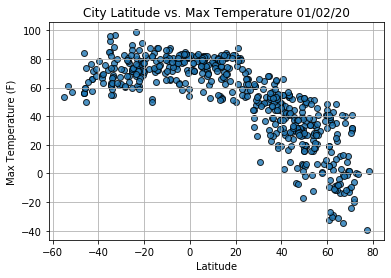

In [40]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

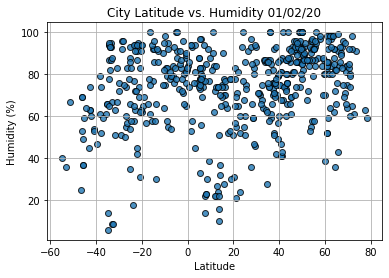

In [41]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

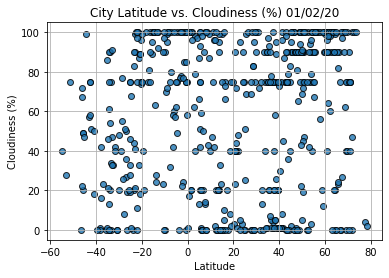

In [42]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

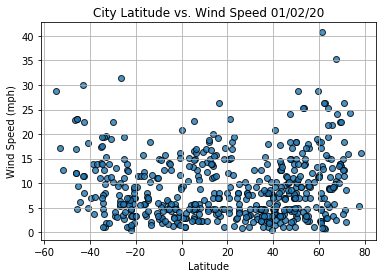

In [43]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()